<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

In [22]:
conda install lxml

Solving environment: ...working... done


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda




# All requested packages already installed.



## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
url = 'C:\\Users\\Ravi\\Documents\\Lambda School\\DS-Unit-4-Sprint-1-NLP\\module2-vector-representations\\data\\job_listings.csv'

df = pd.read_csv(url)
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
# Taking a look at the Beautiful Soup object
from bs4 import BeautifulSoup
import requests

object = BeautifulSoup(df['description'][0], 'lxml')

In [5]:
print(object.get_text())

b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"


In [6]:
# Creating new column in Data Frame with plain text

df['desc'] = [BeautifulSoup(text, 'lxml').get_text() for text in df['description']]

In [7]:
df.head()

,description,title,desc
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...


In [17]:
def cleaner(text):

    cleaned = re.sub('[^a-zA-Z0-9 ]','', text)
    
    return cleaned

In [18]:
df['desc1'] = df['desc'].apply(cleaner)

In [19]:
df.head()

,description,title,desc,desc1
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...",bJob RequirementsnConceptual understanding in ...
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...",bJob DescriptionnnAs a Data Scientist 1 you wi...
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,bAs a Data Scientist you will be working on co...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...",b4969 6756 a monthContractUnder the general s...
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,bLocation USA xe2x80x93 multiple locationsn2 y...


In [20]:
# Filtering for Data Scientist job title

df[df['title'] == 'Data Scientist']

,description,title,desc,desc1
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...",b4969 6756 a monthContractUnder the general s...
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,bLocation USA xe2x80x93 multiple locationsn2 y...
5,b'<div>Create various Business Intelligence An...,Data Scientist,b'Create various Business Intelligence Analyti...,bCreate various Business Intelligence Analytic...
7,"b""Everytown for Gun Safety, the nation's large...",Data Scientist,"b""Everytown for Gun Safety, the nation's large...",bEverytown for Gun Safety the nations largest ...
12,"b""nfosys\xe2\x80\x93 Data &amp; Analytics \xe2...",Data Scientist,"b""nfosys\xe2\x80\x93 Data & Analytics \xe2\x80...",bnfosysxe2x80x93 Data Analytics xe2x80x93 Sr ...
...,...,...,...,...
408,b'<div><p>FinLocker is a leading financial dat...,Data Scientist,b'FinLocker is a leading financial data and an...,bFinLocker is a leading financial data and ana...
409,"b'<div><p>With annual sales of $15 billion, Ec...",Data Scientist,"b'With annual sales of $15 billion, Ecolab (EC...",bWith annual sales of 15 billion Ecolab ECL is...
410,b'<div>Job Description:<br/>\n<br/>\nThe Enter...,Data Scientist,b'Job Description:\n\nThe Enterprise Data Solu...,bJob DescriptionnnThe Enterprise Data Solution...
411,"b""<div>Description:\n<p>Chicago - IL, IL150SW,...",Data Scientist,"b""Description:\nChicago - IL, IL150SW, 150 S W...",bDescriptionnChicago IL IL150SW 150 S Wacker ...


In [25]:
# Creating new Data Frame with filtered results

df_ds = pd.DataFrame(df[df['title'] == 'Data Scientist'])
print(type(df_ds))
df_ds.head()

<class 'pandas.core.frame.DataFrame'>


,description,title,desc,desc1
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...",b4969 6756 a monthContractUnder the general s...
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,bLocation USA xe2x80x93 multiple locationsn2 y...
5,b'<div>Create various Business Intelligence An...,Data Scientist,b'Create various Business Intelligence Analyti...,bCreate various Business Intelligence Analytic...
7,"b""Everytown for Gun Safety, the nation's large...",Data Scientist,"b""Everytown for Gun Safety, the nation's large...",bEverytown for Gun Safety the nations largest ...
12,"b""nfosys\xe2\x80\x93 Data &amp; Analytics \xe2...",Data Scientist,"b""nfosys\xe2\x80\x93 Data & Analytics \xe2\x80...",bnfosysxe2x80x93 Data Analytics xe2x80x93 Sr ...


## 2) Use Spacy to tokenize the listings 

In [22]:
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [23]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df_ds['desc'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.like_num == False) & (token.is_space == False) & (token.is_digit == False):
            doc_tokens.append(token.lemma_)

    tokens.append(doc_tokens)

df_ds['tokens'] = tokens

In [24]:
df_ds.head()

,description,title,desc,desc1,tokens
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...",b4969 6756 a monthContractUnder the general s...,"[b'$4,969, $6,756, monthContractUnder, general..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,bLocation USA xe2x80x93 multiple locationsn2 y...,"[b'Location:, USA, \xe2\x80\x93, multiple, loc..."
5,b'<div>Create various Business Intelligence An...,Data Scientist,b'Create various Business Intelligence Analyti...,bCreate various Business Intelligence Analytic...,"[b'Create, Business, Intelligence, Analytical,..."
7,"b""Everytown for Gun Safety, the nation's large...",Data Scientist,"b""Everytown for Gun Safety, the nation's large...",bEverytown for Gun Safety the nations largest ...,"[b""Everytown, Gun, Safety,, nation's, large, g..."
12,"b""nfosys\xe2\x80\x93 Data &amp; Analytics \xe2...",Data Scientist,"b""nfosys\xe2\x80\x93 Data & Analytics \xe2\x80...",bnfosysxe2x80x93 Data Analytics xe2x80x93 Sr ...,"[b""nfosys\xe2\x80\x93, Data, Analytics, \xe2\x..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [26]:
# Extracting description column from Data Frame and casting as a list

data = [item.strip() for item in df_ds['desc']]

In [27]:
type(data)

list

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', max_features=1000)

#Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [29]:
dtm.head()

,10,100,500,abilities,ability,able,academic,access,accommodation,accommodations,...,x9d,xa2,xa6,xae,xb7,xc2,xe2,year,years,york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,16,0,0,0,0,23,1,2,0


In [30]:
# Length of data list

len(data)

150

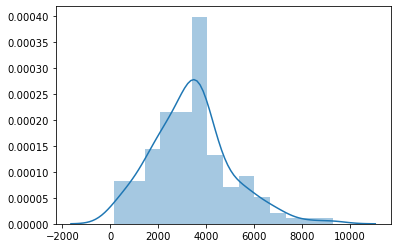

In [31]:
import seaborn as sns

doc_len = [len(doc) for doc in data]

sns.distplot(doc_len);

## 4) Visualize the most common word counts

In [35]:
# Function for analyzing word counts - Courtesy Lecture Notes

from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [36]:
word_count = count(df_ds['desc'])
word_count.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
24,,150,66922,1.0,0.131837,0.131837,1.0
59,e,150,46929,2.0,0.092450,0.224287,1.0
41,n,150,37383,3.0,0.073645,0.297932,1.0
51,i,150,34745,4.0,0.068448,0.366380,1.0
35,a,150,34500,5.0,0.067965,0.434345,1.0


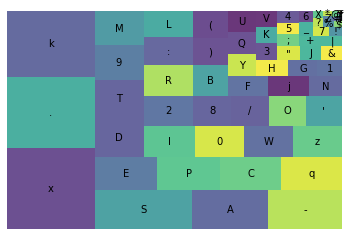

In [37]:
import squarify
import matplotlib.pyplot as plt

wc_top25 = word_count[word_count['rank'] >= 25]

squarify.plot(sizes=wc_top25['pct_total'], label=wc_top25['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(max_features=500)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm1 = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm1 = pd.DataFrame(dtm1.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm1.head()

,ability,able,about,access,achieve,across,action,actionable,ad,advanced,...,x99re,x99s,xa2,xb7,xc2,xe2,year,years,you,your
0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.072188,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.076441,0.000000,0.000000,0.046171
1,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.164108,0.000000,0.154068,0.000000,0.000000
2,0.000000,0.0,0.00000,0.057949,0.0,0.035333,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.046318,0.0,0.02413,0.000000,0.0,0.047465,0.000000,0.0,0.0,0.025398,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.017481,0.035951,0.000000
4,0.000000,0.0,0.01632,0.026326,0.0,0.016052,0.000000,0.0,0.0,0.017178,...,0.0,0.030343,0.656168,0.0,0.0,0.289666,0.025520,0.023647,0.024316,0.000000


### Extracting Lemmas for Model

In [42]:
df_ds = df_ds.drop(['description', 'desc1'], axis=1)

In [43]:
df_ds.head()

,title,desc
3,Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...
5,Data Scientist,b'Create various Business Intelligence Analyti...
7,Data Scientist,"b""Everytown for Gun Safety, the nation's large..."
12,Data Scientist,"b""nfosys\xe2\x80\x93 Data & Analytics \xe2\x80..."


In [39]:
def get_lemmas(doc):
    
    lemmas = []
    doc = nlp(doc)
    
    for token in doc:
        if (token.is_stop != True) & (token.is_punct != True) & (token.is_digit != True):
            lemmas.append(token.lemma_)
    
    return lemmas

In [44]:
# Extracting Lemmas from Column

df_ds['lemmas'] = df_ds['desc'].apply(get_lemmas)

In [45]:
df_ds.head()

,title,desc,lemmas
3,Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","[b'$4,969, $, 6,756, monthcontractunder, gener..."
4,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,"[b'Location, USA, \xe2\x80\x93, multiple, loca..."
5,Data Scientist,b'Create various Business Intelligence Analyti...,"[b'Create, Business, Intelligence, Analytical,..."
7,Data Scientist,"b""Everytown for Gun Safety, the nation's large...","[b""Everytown, Gun, Safety, nation, large, gun,..."
12,Data Scientist,"b""nfosys\xe2\x80\x93 Data & Analytics \xe2\x80...","[b""nfosys\xe2\x80\x93, Data, Analytics, \xe2\x..."


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [55]:
from sklearn.neighbors import NearestNeighbors

# Fitting on DTM
nn = NearestNeighbors(n_neighbors=10, algorithm='kd_tree')
nn.fit(dtm1)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [56]:
test_jd = ["Based in Washington State, our company is looking for dynamic and passionate Data Scientists with backgrounds in other industries mainly finance and retail, to join our team. Our company focuses on defense and intelligence related data processing."]
test_jd = tfidf.transform(test_jd)

In [86]:
results = nn.kneighbors(test_jd.todense())
results = results[1]
results

array([[134,  80, 104,  83,  42, 123, 122, 132, 143, 114]], dtype=int64)

In [98]:
results.ndim

2

In [66]:
data[134]

'b"Are you passionate about using the power of technology to build community? Do you believe residents can strengthen their neighborhoods through dialog and collaboration? Would you like to join a transformative company and play a meaningful role in shaping its future? If so, we\'d love to meet you.\\n\\nWe are looking to hire an experienced Data Scientist to join our team. In this role, you\'ll focus on questions centering around identity, security, and community health. You\'ll help determine what data should be tracked and work with Product and Engineering to implement your vision. You will also be part of the team responsible for building and scaling our data infrastructure that will be the foundation of analytics and data science around our unique data set. You\'ll directly contribute to scaling our analytical abilities and will help lead us to the future of data at Nextdoor.\\n\\nResponsibilities:\\n\\nConduct in-depth analysis on Nextdoor data, analyzing community growth, platfo

In [101]:
data[80]

'b"About the Company\\n\\nEyeview is a video marketing technology company and the industry leader in outcome-based video marketing. Eyeview delivers superior return on investment through 1-to-1 video. Through our proprietary VideoIQ\\xc2\\xae technology, Eyeview easily leverages brand, product and consumer data to create and deliver 1-to-1 video ads to every consumer and ultimately drive sales. VideoIQ\\xc2\\xae provides an elemental knowledge of video variables that powers a results-driven decisioning engine, capable of making billions of decisions each day, delivering the most relevant message to every consumer across connected television, desktop, mobile and Facebook.\\n\\nHeadquartered in New York City, with offices in LA and Chicago, Eyeview serves the nation\'s top brands and was ranked as the 2nd fastest growing company in the Tri-State Area by Deloitte\'s Technology Fast 500TM.\\n\\nAbout the Role\\n\\nEyeview is looking for a Data Scientist to join our Data Science team workin

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 